Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


Load dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
         'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
         'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
         'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
         'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
         'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
         'concavity_worst', 'concave points_worst', 'symmetry_worst',
         'fractal_dimension_worst']
data = pd.read_csv(url, names=names)


Preprocess data

In [3]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})
data.drop(['id'], axis=1, inplace=True)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


Split data into training and testing tests

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Train Decison Tree Classifier

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [6]:
y_predict = clf.predict(X_test)


Evaluate the model

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.86      0.94      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [12]:
X_train = pd.DataFrame(X_train)


Visualize decision tree

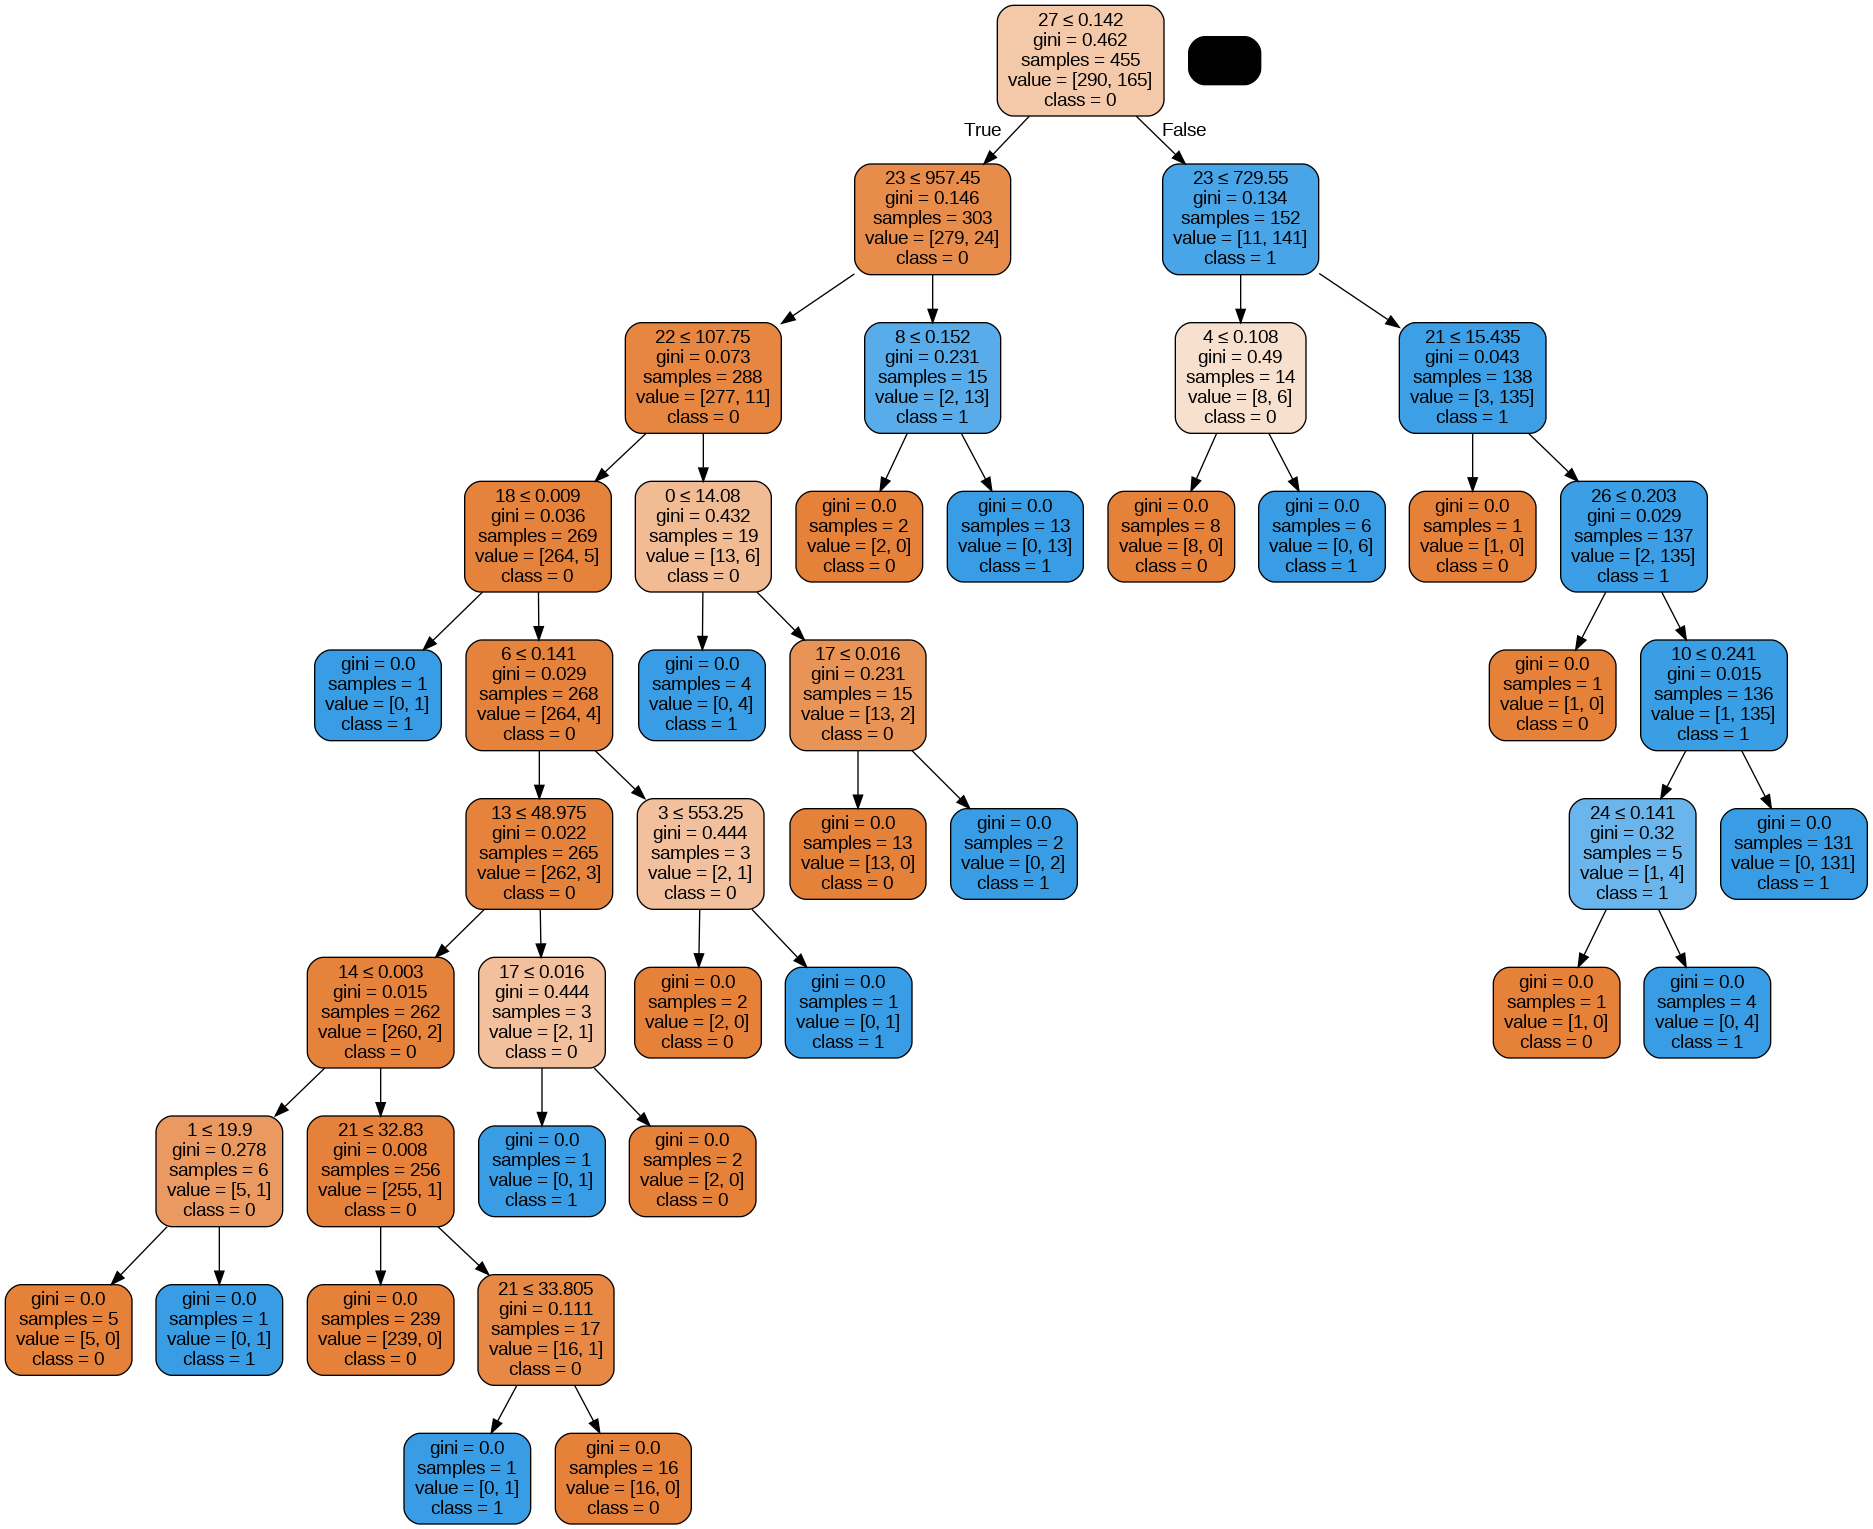

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
